### ----  

requirements (if run locally) : 
- `conda create -n td4 python=3.6`
- `source activate td4`
- `pip install jupyter`
- `pip install torch torchvision`
- `conda install -c conda-forge spacy `
- `python -m spacy download en_core_web_sm`
- `cd ./td4`
- `jupyter notebook`

### ----  



# Machine Learning for NLP : TD 4 
## _Description_

### Course takeaways

### TD outline 

1. Introduction to pytorch
2. Sequence Labelling with pytorch


### Resources : 

https://pytorch.org/tutorials/  
https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html    
https://stats.stackexchange.com/questions/268202/backpropagation-algorithm-nn-with-rectified-linear-unit-relu-activation   
https://ruder.io/optimizing-gradient-descent/

## Pytorch
PyTorch is a Python based library for scientific computing that provides three main features:
- An n-dimensional Tensor, which is similar to numpy but can run on GPUs
- Easily build big computational graphs for deep learning
- Automatic differentiation for computing gradients 

Usages : 
- It’s a Python-based scientific computing package targeted at two sets of audiences:
    - A replacement for NumPy to use the power of GPUs
    - a deep learning research platform that provides maximum flexibility and speed


## Pytorch basics

**NB** : Tensor are the basics block of pytorch. Tensor allows to store data (input data or target data) as well as the parameters (also called weights, neurons,...) of your neural network.


- tensor creation 
- tensor types 
- basic operations between tensors
- from and to numpy 
- about GPU 

In [0]:
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Tensors


**What is a pytorch tensor ?** : A torch.Tensor is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

**How to define a pytoch tensor ?**
- using existing constructors : _torch.ones_ , _torch.zeros_ _torch.rand_
- based on existing object
    - from another tensor (or only using the shape of the other tensor)
    - from a python list 
    - from a numpy array

In [0]:
# define 
ones = torch.ones(3,2)
# a tensor can be printed
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


In [0]:
# other basic definition 
print(torch.zeros(5,3), "\n", 
      torch.rand(2,3), "\n", 
      torch.empty(2,2))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]) 
 tensor([[0.3339, 0.6934, 0.3167],
        [0.3809, 0.1759, 0.6248]]) 
 tensor([[2.5898e-36, 0.0000e+00],
        [0.0000e+00, 0.0000e+00]])


In [0]:
# from a python list 
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4,-4]]]
tensor = torch.Tensor(ls)
print(tensor)
# from a numpy array : 
array = np.array([0,1])
#array
tensor = torch.from_numpy(array)
print(tensor)
# symetrically  tensor.numpy()

tensor([[[ 1.,  3.,  5.,  6.],
         [-1.,  4.,  4.,  4.]],

        [[-1., -3., -5., -6.],
         [10., -4., -4., -4.]]])
tensor([0, 1])


In [0]:
# list must be in a proper matrix shape
ls = [[[1,3,5,6],[-1,4,4,4]],[[-1,-3,-5,-6],[10,-4,-4]]]
torch.Tensor(ls)

ValueError: ignored

**Basic manipulations**
- access type / change data types 
- access elements 
- reshape 
- maths opertions : add, multiply , ..
- differentiate / derive
- set to a specific _device_ : GPU , GPU:0, GPU:1 , CPU ...

In [0]:
# get type 
print(tensor,tensor.dtype)
# change type 
tensor = tensor.float()

tensor([0, 1]) torch.int64


**NB** : types are important in Deep Learning  because : 
- some types are more memory consumming than others : e.g : float16 vs float32
- some operations require specific type (cf. Embedding layer ...)

In [0]:
tensor = torch.rand(5,2,2)
print(tensor)
# access one element
print(tensor[0,1,1])
# access several element
print(tensor[:3,0,:2])

tensor([[[0.9397, 0.6660],
         [0.9896, 0.9162]],

        [[0.8674, 0.7286],
         [0.8566, 0.1337]],

        [[0.0909, 0.9817],
         [0.2359, 0.2422]],

        [[0.3359, 0.9101],
         [0.3049, 0.1896]],

        [[0.5454, 0.8767],
         [0.0199, 0.9253]]])
tensor(0.9162)
tensor([[0.9397, 0.6660],
        [0.8674, 0.7286],
        [0.0909, 0.9817]])


**NB** : pytorch tensor indexing exactly match numpy indexing

In [0]:
# get the shape of a tensor
tensor.size()
# reshape it 
print(tensor, "\n",
      tensor.view(2,2,5))

tensor([[[0.9397, 0.6660],
         [0.9896, 0.9162]],

        [[0.8674, 0.7286],
         [0.8566, 0.1337]],

        [[0.0909, 0.9817],
         [0.2359, 0.2422]],

        [[0.3359, 0.9101],
         [0.3049, 0.1896]],

        [[0.5454, 0.8767],
         [0.0199, 0.9253]]]) 
 tensor([[[0.9397, 0.6660, 0.9896, 0.9162, 0.8674],
         [0.7286, 0.8566, 0.1337, 0.0909, 0.9817]],

        [[0.2359, 0.2422, 0.3359, 0.9101, 0.3049],
         [0.1896, 0.5454, 0.8767, 0.0199, 0.9253]]])


In [0]:
intTensor = torch.ones(3,2, dtype=torch.float32)
print(intTensor, intTensor.dtype)
intTensor.int()

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]]) torch.float32


tensor([[1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int32)

### All operations on tensors 
- all reshape 
- squeeze 
- sum , prod 
- max, norm ...

## Automatic Differentiation 

The core component of any modern deep learning library is _Automatic Differentiation_. 


**Recall**
- Training any deep learning model requires backpropagatation 
- Backpropagation is an algorithm that efficiently computes the gradient of a neural network's output based on its input and with regard to all its parameters (or also named weights)

_Automatic Differentiation_ provides a way of automatically computing gradients of any function. In other words, _automatic differentiation_ gives you the possibility to build complex neural network without caring about computing the gradients by yourself. 


**NB** 

Having access to an open source library that performs Automatic Differentation (tensorflow/pytorch and before Dynet or Theano..) is one of the reasons for the popularity and sucess of Deep Learning today.

### Automatic Differentiation in a nutshell


**Definition**
Automatic differentiation refers to a general way of taking a program which computes a value, and automatically constructing a procedure for computing derivatives of that value.

Automatic Differentation requires 3 steps 

1. Building a computation Graph 
2. propagating inputs throughout the graph (forward pass)
3. Computing gradient of each of the node in the graph (backward pass)

In [0]:
x = torch.ones(2, 2, requires_grad=True)
# double checking if gradient 
print("Checking gradient is set to {}. Its gradient is still {} ".format(x.requires_grad, x.grad))

Checking gradient is set to True. Its gradient is still None 


In [0]:
# let us define a basic operation
y = x+1
print(y)

tensor([[2., 2.],
        [2., 2.]], grad_fn=<AddBackward0>)


In [0]:
# y has now a gradient attribute , grad is none
y.grad_fn, y.grad

(<AddBackward0 at 0x7f51ad3d5630>, None)

In [0]:
z = y * y * 3
out = z.mean()
print(z, out, z.grad)

tensor([[12., 12.],
        [12., 12.]], grad_fn=<MulBackward0>) tensor(12., grad_fn=<MeanBackward0>) None


In [0]:
out.backward()
# Let's inspect the gradient at each previous variable' gradients now
print("Gradients with regard to intermediate nodes:", out.grad, z.grad, y.grad)
print("Gradients with regard to the input node that we considered to be the parameter:", x.grad)

Gradients with regard to intermediate nodes: None None None
Gradients with regard to the input node that we considered to be the parameter: tensor([[3., 3.],
        [3., 3.]])


### Questions:
- Find the function that is being differentiated with regard to x_ij.
- Try to manually retrieve the same gradient with the function you found for x=[[1, 1], [1, 1]].

In [0]:
# to manipulate a tensor without its gradient 
out.detach()

tensor(12.)

## Pytorch Model


Our goal is to define a deep learning model, train it, make prediction with it and evaluate it. 

With pytorch this means doing the three following "scripts" : 
1. Defining the model 
2. Implementing the prediction 
3. Implementing the training loop 
    - Defining a loss
    - Defining an optimizer
    - Loop :
        - forward pass 
        - backward pass
        - applying optimization update rule
4. Evaluating the model / playing with it 
    - You can use the training criteria (loss) as your evaluation score
    - You can use another score : accuracy, F1 , ...

### 1. Defining the model 
Pytorch models always follow the same template : 

- a class
- defining all layers (or parameters) in _init_()
- defining the forward pass in foward()

Let's see what it looks like with a simple 2 layers model.

All trivial Neural Network layers can generally be found in [torch.nn](https://pytorch.org/docs/stable/nn.html).

**Warning**: All your parametrized modules (Layers or any trainable vectors) must be defined as *direct* attributes to your ```nn.Module``` class so that the call to ```.backward()``` can properly propagate the gradients through everything. To define layers in list attribute, (resp. dictionary attributes) use ```ModuleList``` (resp. ```ModuleDict```).


<img src="./imgs/nn.png">



In [0]:
# defining the model 
class MyModel(torch.nn.Module):
    def __init__(self, D_in, H, D_out):
        """
        In the constructor we instantiate two nn.Linear modules and assign them as
        member variables.
        """
        super(MyModel, self).__init__()
        self.linear1 = torch.nn.Linear(D_in, H, bias=True)
        self.linear2 = torch.nn.Linear(H, D_out, bias=True)

    def forward(self, x):
        """
        In the forward function we accept a Tensor of input data and we must return
        a Tensor of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Tensors.
        """
        h_relu = torch.relu(self.linear1(x))
        y_pred = self.linear2(h_relu)
        return y_pred

### 2. Forward pass 
1. instanciating the model
2. getting input data 
3. computing the foward pass

In [0]:
# instanciating the model 
N, D_in, H, D_out = 2, 10, 10, 2

# Construct our model by instantiating the class defined above 
# Note: all the parameters are initialized here 
model = MyModel(D_in, H, D_out)
# You can look up into the model 
model

MyModel(
  (linear1): Linear(in_features=10, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=2, bias=True)
)

In [0]:
# Create random Tensors to hold inputs and outputs
x = torch.randn(N, D_in)
y = torch.randn(N, D_out)

In [0]:
#model = MyModel(D_in, H, D_out)
# forward pass / predict x 
y_pred = model(x) # almost equivalent to model.forward(x)
# y_pred
y_pred

tensor([[-0.0904, -0.0225],
        [ 0.0936,  0.1422]], grad_fn=<AddmmBackward>)

### Questions 
- Why do the prediction change if the model is re-instanciated ? 
- Can this be a problem ? 
- How to avoid it ? 

### 3. Training loop 

- Criterion : 

a model is trained with regard to a _training criterion_ or a _loss_.   
Pytorch provides many different pre-coded losses : 
    - Mean-Square Error 
    - Categorical Cross-Entropy , ...

Most of them can be found in [torch.nn](https://pytorch.org/docs/stable/nn.html) 
- Optimizer 

In pytorch as in any deep learning framwork, models are trained with backpropagation. Backpropagation consists in applying Stochastic Gradient Descent (SGD) to a neural network. There is a broad range of variants around the simple form of SGD. 

Pytorch provides pre-defined objects for many different forms of Gradient Descent algorithm in [torch.optim](https://pytorch.org/docs/stable/optim.html):
- SGD 
- Adadelta 
- Adam 

Your optimizer will be instanciated with it's configuration(*e.g.* the *step_size* or *learning_rate* for SGD), and the network's parameters.

Overview of all the Gradient Descent based algorithms : https://ruder.io/optimizing-gradient-descent/ 


- Training Loop :
    - forward pass to get prediction and the loss value 
    - zero_grad : Resetting the gradient value to zero for all parameters before adding their newly backpropagated values) 
    - compute the gradients' value with loss.backward()
    - update all the parameters of the model with optimizer.step()



In [0]:
# instanciate the model 
# Note: all the model parameters are intialized at this step
model = MyModel(D_in, H, D_out)

criterion = torch.nn.MSELoss(reduction='mean')
optimizer = torch.optim.SGD(model.parameters(), lr=1e-4)

# t is normally also an index over the samples (or batches) in your dataset,
# but we will just consider it to be a time-step here
for t in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x)
    print('y_pred', y_pred)
    # Compute and print loss
    loss = criterion(y_pred, y)
    print('loss', loss)
    if t % 100 == 0:
        print("Step:{} Loss:{} ".format(t, loss.item()))

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    print('first thing', optimizer.zero_grad())
    loss.backward()
    #print('second one', loss.backward())
    optimizer.step()


y_pred tensor([[-0.6543,  0.1820],
        [-0.3713,  0.4293]], grad_fn=<AddmmBackward>)
loss tensor(2.8542, grad_fn=<MseLossBackward>)
Step:0 Loss:2.8542280197143555 
first thing None
y_pred tensor([[-0.6544,  0.1818],
        [-0.3718,  0.4289]], grad_fn=<AddmmBackward>)
loss tensor(2.8532, grad_fn=<MseLossBackward>)
first thing None
y_pred tensor([[-0.6546,  0.1817],
        [-0.3724,  0.4285]], grad_fn=<AddmmBackward>)
loss tensor(2.8521, grad_fn=<MseLossBackward>)
first thing None
y_pred tensor([[-0.6547,  0.1815],
        [-0.3729,  0.4281]], grad_fn=<AddmmBackward>)
loss tensor(2.8510, grad_fn=<MseLossBackward>)
first thing None
y_pred tensor([[-0.6549,  0.1813],
        [-0.3734,  0.4277]], grad_fn=<AddmmBackward>)
loss tensor(2.8500, grad_fn=<MseLossBackward>)
first thing None
y_pred tensor([[-0.6550,  0.1812],
        [-0.3740,  0.4273]], grad_fn=<AddmmBackward>)
loss tensor(2.8489, grad_fn=<MseLossBackward>)
first thing None
y_pred tensor([[-0.6552,  0.1810],
        [-0.374

If the Loss decrease it means the gradient descent is working !! 

**Note:** Don't forget the zero_grad()
- we are doing gradient backpropagation at each step 
- gradients are computed with the loss.backward 
- after each update we must set to zero all the gradients values otherwise they get accumulated (hence zero_grad())

### Questions : 

- plot the loss 

Step:0 Loss:0.41059061884880066 
Step:2000 Loss:0.13770100474357605 
Step:4000 Loss:0.04693802073597908 
Step:6000 Loss:0.017203692346811295 
Step:8000 Loss:0.00673338770866394 
Step:10000 Loss:0.0028918448369950056 
Step:12000 Loss:0.0013349975924938917 
Step:14000 Loss:0.0006410683272406459 
Step:16000 Loss:0.0003133623395115137 
Step:18000 Loss:0.00015432070358656347 


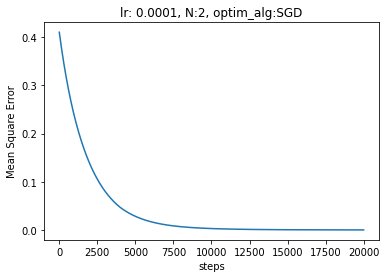

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
from torch.optim import SGD, Adam

def plot_loss(lr, N, optim_alg, target=None, max_steps=None):
    """
    This function takes as arguments:
    lr: the learning rate
    N: the number of samples
    optim_alg: the optimisation algorithm
    target: a target value for the loss ( a message should printed when this 
            target is reached)
    max_steps: the number of gradient steps for the optimisation process
    """
    model = MyModel(D_in, H, D_out)
    
    x = torch.randn(N, D_in)
    y = torch.randn(N, D_out)
    
    criterion = torch.nn.MSELoss(reduction='mean')
    optimizer = optim_alg(model.parameters(), lr=lr)
    # t is normally also an index over the samples (or batches) in your dataset,
    # but we will just consider it to be a time-step here
    loss_list = []
    for t in range(max_steps or 20000):
        # Forward pass: Compute predicted y by passing x to the model
        y_pred = model(x)

        # Compute and print loss
        loss = criterion(y_pred, y)
        loss_list.append(loss.item()) # item is a method for obtaining a python
                                      # scalar from a 0-dim tensor
        if t % 2000 == 0:
            print("Step:{} Loss:{} ".format(t, loss.item()))
        
        if target is not None and loss.item() < target:
          print("Target {} reached at step {} !!".format(target, t))
          target = None

        # Zero gradients, perform a backward pass, and update the weights.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    plt.plot(range(len(loss_list)), loss_list)
    plt.xlabel('steps')
    plt.ylabel('Mean Square Error')

plt.title('lr: {}, N:{}, optim_alg:{}'.format(1e-4, 2, 'SGD'))
plot_loss(lr=1e-4, N=2, optim_alg=SGD)
plt.show()


- how many steps do you need for the loss to reach 1e-1 ? 

Step:0 Loss:1.242738962173462 
Step:2000 Loss:0.4518018662929535 
Step:4000 Loss:0.1473163366317749 
Target 0.1 reached at step 4590 !!
Step:6000 Loss:0.036303672939538956 
Step:8000 Loss:0.007822928950190544 
Step:10000 Loss:0.0018115142593160272 
Step:12000 Loss:0.0005138959386385977 
Step:14000 Loss:0.00017814431339502335 
Step:16000 Loss:7.028091931715608e-05 
Step:18000 Loss:2.9805873055011034e-05 


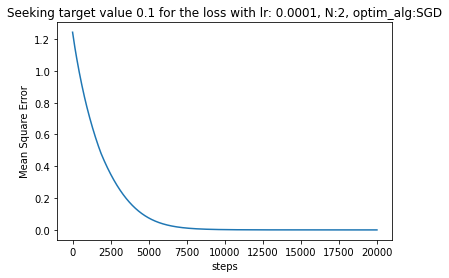

In [0]:
target = 1e-1
plt.title('Seeking target value {} for the loss with lr: {}, N:{}, optim_alg:{}'.format(target, 1e-4, 2, 'SGD'))
plot_loss(lr=1e-4, N=2, optim_alg=SGD, target=target)
plt.show()


- now same question if
        - lr=1e-5,1-3 
        - N = 10, 100, 1000 (NB : you can )
        - optim.Adam 

Step:0 Loss:0.9140158295631409 
Step:2000 Loss:0.824977695941925 
Step:4000 Loss:0.7460771203041077 
Step:6000 Loss:0.6777891516685486 
Step:8000 Loss:0.6233746409416199 
Step:10000 Loss:0.572714626789093 
Step:12000 Loss:0.5254263281822205 
Step:14000 Loss:0.48114824295043945 
Step:16000 Loss:0.4400867521762848 
Step:18000 Loss:0.4019351899623871 


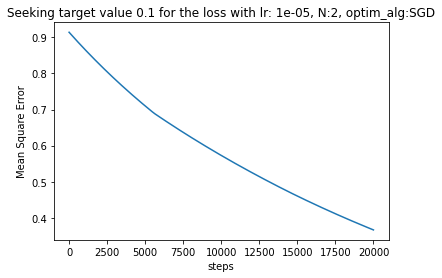

Step:0 Loss:1.3782389163970947 
Target 0.1 reached at step 784 !!
Step:2000 Loss:6.656722689513117e-05 
Step:4000 Loss:8.632932702035134e-10 
Step:6000 Loss:1.1668233046435716e-10 
Step:8000 Loss:1.1381129372267651e-10 
Step:10000 Loss:1.1117873288668534e-10 
Step:12000 Loss:1.1025769186545631e-10 
Step:14000 Loss:1.0766948443929891e-10 
Step:16000 Loss:1.0676803885445452e-10 
Step:18000 Loss:1.0515732729032834e-10 


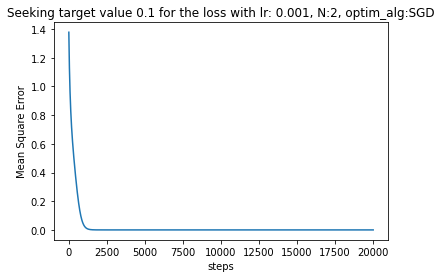

Step:0 Loss:1.0732825994491577 
Step:2000 Loss:0.9217032194137573 
Step:4000 Loss:0.844029426574707 
Step:6000 Loss:0.7957220077514648 
Step:8000 Loss:0.7591313123703003 
Step:10000 Loss:0.7274149060249329 
Step:12000 Loss:0.6976639628410339 
Step:14000 Loss:0.6677900552749634 
Step:16000 Loss:0.6379891633987427 
Step:18000 Loss:0.6070249080657959 


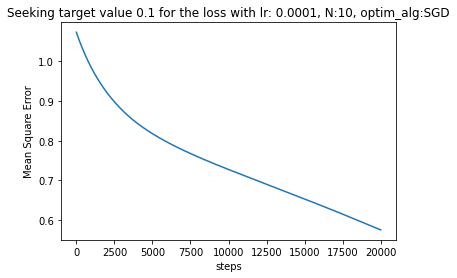

Step:0 Loss:1.1433464288711548 
Step:2000 Loss:1.0694406032562256 
Step:4000 Loss:1.0305896997451782 
Step:6000 Loss:1.0077059268951416 
Step:8000 Loss:0.9928422570228577 
Step:10000 Loss:0.9820494055747986 
Step:12000 Loss:0.973360002040863 
Step:14000 Loss:0.9658969044685364 
Step:16000 Loss:0.959117591381073 
Step:18000 Loss:0.9528867602348328 


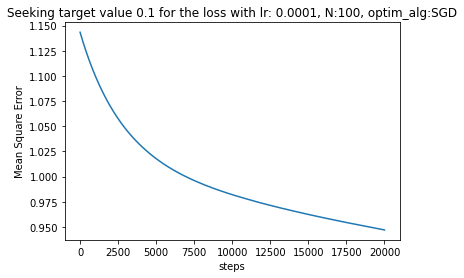

Step:0 Loss:1.1768341064453125 
Step:2000 Loss:1.0983630418777466 
Step:4000 Loss:1.0641971826553345 
Step:6000 Loss:1.0483276844024658 
Step:8000 Loss:1.0402816534042358 
Step:10000 Loss:1.0357235670089722 
Step:12000 Loss:1.0327825546264648 
Step:14000 Loss:1.0306527614593506 
Step:16000 Loss:1.0289491415023804 
Step:18000 Loss:1.0274962186813354 


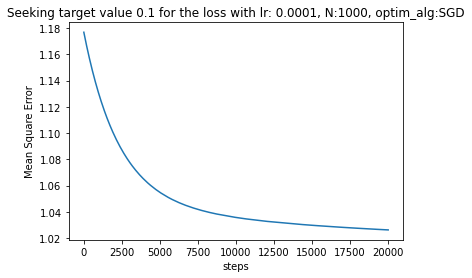

Step:0 Loss:1.0120646953582764 
Target 0.1 reached at step 1060 !!
Step:2000 Loss:0.0060042524710297585 
Step:4000 Loss:1.6222811982657959e-09 
Step:6000 Loss:2.4356072714226684e-12 
Step:8000 Loss:1.7985612998927536e-14 
Step:10000 Loss:3.552713678800501e-15 
Step:12000 Loss:0.0 
Step:14000 Loss:0.0 
Step:16000 Loss:0.0 
Step:18000 Loss:0.0 


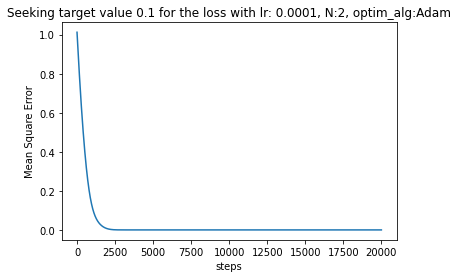

In [0]:
for lr in [1e-5, 1e-3]:
  plt.title('Seeking target value {} for the loss with lr: {}, N:{}, optim_alg:{}'.format(target, lr, 2, 'SGD'))
  plot_loss(lr=lr, N=2, optim_alg=SGD, target=target)
  plt.show()
for N in [10, 100, 1000]:
  plt.title('Seeking target value {} for the loss with lr: {}, N:{}, optim_alg:{}'.format(target, 1e-4, N, 'SGD'))
  plot_loss(lr=1e-4, N=N, optim_alg=SGD, target=target)
  plt.show()
plt.title('Seeking target value {} for the loss with lr: {}, N:{}, optim_alg:{}'.format(target, 1e-4, 2, 'Adam'))
plot_loss(lr=1e-4, N=2, optim_alg=Adam, target=target)
plt.show()



- What can you conclude on the capacity of a neural network ? 


## Sequence Labelling with pytorch

Now that we have seen how to build a simple neural network, let's build a model for a task more useful in NLP : _Sequence Labelling_ 

Recall : Sequence labelling is the task of predicting a label to a sequence among a fixed range of possibilities 

e.g : Sentiment Analysis 


<img src="./imgs/sentiment_analysis.png">



### 1. Define the model
Define a neural network that uses an LSTM ([nn.LSTM](https://pytorch.org/docs/stable/nn.html)) to classify the elements of a sequence.

 The input sequence will be given to the neural network as a series of indexes. Each index (corresponding to a token in the source vocabulary) will be transformed to a corresponding trainable embedding ([nn.Embedding](https://pytorch.org/docs/stable/nn.html)) before entering the LSTM.   

In [0]:
class SequenceLabeller(nn.Module):

    def __init__(self, embedding_dim, hidden_dim, vocab_size, num_classes, sequence_model="LSTM"):
        super(SequenceLabeller, self).__init__()

        self.hidden_dim = hidden_dim
        self.word_embeddings = nn.Embedding(vocab_size, embedding_dim)
        
        if sequence_model == "LSTM":
            # The LSTM takes word embeddings as inputs, and outputs hidden states
            # with dimensionality hidden_dim.
            self.seq = nn.LSTM(embedding_dim, hidden_dim,batch_first=True)
        else:
            raise(Exception("Sequence model {} not supported".format(sequence_model)))

        # The linear layer that maps from hidden state space to class space
        self.hidden2tag = nn.Linear(hidden_dim, num_classes)

    def forward(self, sentence):
        embeds = self.word_embeddings(sentence)
        seq_output, (h_n,c_n) = self.seq(embeds)
        tag_space = self.hidden2tag(seq_output)
        # Although we will be performing binary classification, this is a 
        # general implementation displaying what should be done for n_classes>2
        tag_scores = F.log_softmax(tag_space, dim=2) # Computationally efficient for the criterion
        return tag_scores

### 2.1 Prepare the data
First, put the three files given [here](https://drive.google.com/drive/folders/19fFgwB0Vk9mfGcA2TNhIeViBHYR4zATX?usp=sharing) in your working folder. Then, choose a data file to perform your sequence labelling and use the given loop to read it.
*optional* 
- inspect the data files
- try to guess how the data is being parsed by the loop
- inspect the ``re`` package [documentation](https://docs.python.org/3/library/re.html) and see whether you were right.

In [0]:
import re
import spacy
tokenizer = spacy.load("en_core_web_sm")

In [0]:

def get_data(path):
  data = []
  no_match = 0
  with open(path, "r") as f:
      for line in f:
          match  = re.search("(.*)\s\s([0-1]+).*", line)
          if match is not None:
              tokenized = tokenizer(match.group(1).strip())
              sent = [token.text for token in  tokenized]
              score = match.group(2)
              data.append((sent,int(score)))
          else:
            match  = re.search("(.*),([0-1]+).*", line)
            if match is not None:
              tokenized = tokenizer(match.group(1).strip())
              sent = [token.text for token in  tokenized]
              score = match.group(2)
              data.append((sent,int(score)))
            else:
              no_match += 1
  return data, no_match

data, no_match = get_data("./imdb_labelled.csv")
training_data = data[:int(len(data)*4/5)]
test_data = data[int(len(data)*4/5):]
print("Got {} training examples, {} test examples, and failed to capture "
"{} examples.".format(len(training_data), len(test_data), no_match))


Got 800 training examples, 200 test examples, and failed to capture 1 examples.


In [0]:
len(data)

1000


Prepare:
- a structure that maps each token in your source vocabulary to a unique index.
- a structure that matches each index to it's corresponding token in the source vocabulary
- a structure that maps each label to an index
- a function that turns a token sequence to the corresponding index sequence

The labels in this case are indexes themselves(`0`, `1`) but they can be otherwise (_e.g._ `positive`, `negative`, `amusing`, `anxious` ...)




In [0]:
def prepare_sequence(seq, to_ix):
    idxs = [to_ix[w] if w in to_ix else len(to_ix) for w in seq]
    idxs = torch.tensor(idxs, dtype=torch.long).unsqueeze(0)
    return idxs

word_to_ix = {}
tag_to_ix = {}
for sent, tag in training_data:
    if tag not in tag_to_ix:
        tag_to_ix[tag] = len(tag_to_ix)
    for word in sent:
        if word not in word_to_ix:
            word_to_ix[word] = len(word_to_ix)
print(tag_to_ix)


{0: 0, 1: 1}


Inspect your data 

1.   Élément de liste
2.   Élément de liste



In [0]:
training_data[:6]

[(['A',
   'very',
   ',',
   'very',
   ',',
   'very',
   'slow',
   '-',
   'moving',
   ',',
   'aimless',
   'movie',
   'about',
   'a',
   'distressed',
   ',',
   'drifting',
   'young',
   'man',
   '.'],
  0),
 (['Not',
   'sure',
   'who',
   'was',
   'more',
   'lost',
   '-',
   'the',
   'flat',
   'characters',
   'or',
   'the',
   'audience',
   ',',
   'nearly',
   'half',
   'of',
   'whom',
   'walked',
   'out',
   '.'],
  0),
 (['Attempting',
   'artiness',
   'with',
   'black',
   '&',
   'white',
   'and',
   'clever',
   'camera',
   'angles',
   ',',
   'the',
   'movie',
   'disappointed',
   '-',
   'became',
   'even',
   'more',
   'ridiculous',
   '-',
   'as',
   'the',
   'acting',
   'was',
   'poor',
   'and',
   'the',
   'plot',
   'and',
   'lines',
   'almost',
   'non',
   '-',
   'existent',
   '.'],
  0),
 (['Very', 'little', 'music', 'or', 'anything', 'to', 'speak', 'of', '.'], 0),
 (['The',
   'best',
   'scene',
   'in',
   'the',
   'movi

### 2.2 Forward pass
Instanciate the model and perform a forward pass on the first sentence in your data.  
See what the scores are before training.  
Note that element i,j of the output is the score for tag j for word i.  
Here we don't need to train, so the code is wrapped in `torch.no_grad()`

In [0]:
# the additional vocabulary element is to account for unkown words
model = SequenceLabeller(50, 100, len(word_to_ix)+1, len(tag_to_ix)) 
inputs = prepare_sequence(training_data[0][0], word_to_ix)
with torch.no_grad():
    sent_scores = model(torch.cat([inputs]))
    print("Input tokens {} scores {} ".format(inputs, sent_scores))

Input tokens tensor([[ 0,  1,  2,  1,  2,  1,  3,  4,  5,  2,  6,  7,  8,  9, 10,  2, 11, 12,
         13, 14]]) scores tensor([[[-0.7193, -0.6677],
         [-0.7390, -0.6493],
         [-0.6543, -0.7335],
         [-0.7037, -0.6827],
         [-0.6344, -0.7556],
         [-0.6942, -0.6921],
         [-0.7061, -0.6803],
         [-0.7275, -0.6599],
         [-0.6869, -0.6994],
         [-0.6416, -0.7475],
         [-0.6449, -0.7438],
         [-0.6966, -0.6897],
         [-0.7046, -0.6818],
         [-0.6964, -0.6899],
         [-0.7198, -0.6671],
         [-0.6572, -0.7305],
         [-0.6988, -0.6875],
         [-0.6903, -0.6960],
         [-0.7160, -0.6708],
         [-0.6540, -0.7339]]]) 


In [0]:
model

SequenceLabeller(
  (word_embeddings): Embedding(2873, 50)
  (seq): LSTM(50, 100, batch_first=True)
  (hidden2tag): Linear(in_features=100, out_features=2, bias=True)
)

## Training 
### 3.1  Optimizer and loss
Instanciate an optimizer and a loss function for your network from pytorch. 

In [0]:
loss_function = nn.NLLLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 


Normally, one would use nn.BCELoss for binary classification, but again, we will implement a generic n_class classification loss.

You could also use ``nn.CrossEntropyLoss``, but for that, you have to remove the LogSoftmax because it applies it internally.

### 3.2 Training loop 
Write a loop that goes through the data `n_epochs=40` times, and trains on it.  
The network should train all the word tags in a sentence to produce the entire sentence's label. This fuzzy kind of supervision is called weak-supervision (weakly-supervised learning). 
tip: You should transform your target tags with [one_hot](https://pytorch.org/docs/stable/nn.functional.html#one-hot) before giving them to NLLLoss.

In [0]:
from torch.nn.functional import one_hot
n_epochs = 40
for epoch in range(n_epochs):  # again, normally you would NOT do 300 epochs, it is toy data
    loss_mean_ep = 0
    n_sample = 0
    for sentence, tags in training_data:
        if len(sentence) < 2: continue
        # Step 1. Remember that Pytorch accumulates gradients.
        # We need to clear them out before each instance
        model.zero_grad()
        # Step 2. Get our inputs ready for the network, that is, turn them into
        # Tensors of word indices.
        sentence_in = prepare_sequence(sentence, word_to_ix)
        #import pdb
        #pdb.set_trace()
        targets = prepare_sequence([tags], tag_to_ix)
        one_hot_targets = one_hot(targets.squeeze(0), num_classes=len(tag_to_ix))
        # Step 3. Run our forward pass.
        tag_scores = model(sentence_in)
        # Step 4. Compute the loss, gradients, and update the parameters by
        #  calling optimizer.step()
        #import pdb
        #pdb.set_trace()
        # print(tag_scores.shape, one_hot_targets.shape)
        loss = loss_function(tag_scores, one_hot_targets)
        loss_mean_ep += loss
        n_sample += 1
        loss.backward()
        optimizer.step()
    print("Epoch {} loss {:0.4f} ".format(epoch, loss/n_sample))

Epoch 0 loss 0.0009 
Epoch 1 loss 0.0009 
Epoch 2 loss 0.0009 
Epoch 3 loss 0.0009 
Epoch 4 loss 0.0009 
Epoch 5 loss 0.0009 
Epoch 6 loss 0.0008 
Epoch 7 loss 0.0008 
Epoch 8 loss 0.0008 
Epoch 9 loss 0.0008 
Epoch 10 loss 0.0008 
Epoch 11 loss 0.0008 
Epoch 12 loss 0.0008 
Epoch 13 loss 0.0008 
Epoch 14 loss 0.0008 
Epoch 15 loss 0.0007 
Epoch 16 loss 0.0007 
Epoch 17 loss 0.0007 
Epoch 18 loss 0.0007 
Epoch 19 loss 0.0007 
Epoch 20 loss 0.0006 
Epoch 21 loss 0.0006 
Epoch 22 loss 0.0006 
Epoch 23 loss 0.0006 
Epoch 24 loss 0.0006 
Epoch 25 loss 0.0005 
Epoch 26 loss 0.0005 
Epoch 27 loss 0.0005 
Epoch 28 loss 0.0005 
Epoch 29 loss 0.0004 
Epoch 30 loss 0.0004 
Epoch 31 loss 0.0004 
Epoch 32 loss 0.0004 
Epoch 33 loss 0.0004 
Epoch 34 loss 0.0004 
Epoch 35 loss 0.0003 
Epoch 36 loss 0.0003 
Epoch 37 loss 0.0003 
Epoch 38 loss 0.0003 
Epoch 39 loss 0.0003 


In [0]:
test_data

[(['In',
   'fact',
   ',',
   'this',
   'stinker',
   'smells',
   'like',
   'a',
   'direct',
   '-',
   'to',
   '-',
   'video',
   'release',
   '.'],
  0),
 (['Avoid', 'at', 'ALL', 'costs', '!'], 0),
 (['Star',
   'Trek',
   'V',
   'The',
   'final',
   'Frontier',
   'is',
   'the',
   'worst',
   'in',
   'the',
   'series',
   '.'],
  0),
 (['The',
   'acting',
   'from',
   'all',
   'involved',
   'and',
   'that',
   'includes',
   'those',
   'like',
   'Shatner',
   'and',
   'Nimoy',
   'is',
   'bad',
   'and',
   'washed',
   'out',
   'and',
   'making',
   'them',
   'seem',
   'as',
   'old',
   'as',
   'they',
   'look',
   'in',
   'real',
   'life',
   ',',
   'the',
   'special',
   'effects',
   'are',
   'tacky',
   'like',
   'when',
   'Spock',
   'has',
   'to',
   'rescue',
   'Kirk',
   'on',
   'a',
   'jet',
   'pack',
   'when',
   'he',
   'falls',
   'down',
   'from',
   'a',
   'mountain',
   '.'],
  0),
 (['The',
   'attempts',
   'at',
   'hu

### 4. Evaluating model 


#### 1 - Evaluate your data qualitatively by inspecting 3 predictions for positive examples and 3 for negative ones on the test data

In [0]:
with torch.no_grad():
  label_count = [0, 0]
  n_samples = 5
  for sentence, tag in test_data:
          label_count[tag] += 1
          if label_count[tag] <= n_samples:
            sentence_in = prepare_sequence(sentence, word_to_ix)
            sentence_tag = 'Positive' if tag==1 else 'Negative'
            tag_scores = model(sentence_in)
            positive_score = torch.mean(torch.exp(tag_scores.squeeze(0)[:, 1])).item()
            print("{} sentence scored {} \"{}\"."
            "".format(sentence_tag, positive_score,' '.join(sentence)) )
          if (label_count[0] >= n_samples) and (label_count[1] >= n_samples):
            break

Negative sentence scored 0.40734031796455383 "In fact , this stinker smells like a direct - to - video release .".
Negative sentence scored 0.3638526499271393 "Avoid at ALL costs !".
Negative sentence scored 0.3530091941356659 "Star Trek V The final Frontier is the worst in the series .".
Negative sentence scored 0.4768477976322174 "The acting from all involved and that includes those like Shatner and Nimoy is bad and washed out and making them seem as old as they look in real life , the special effects are tacky like when Spock has to rescue Kirk on a jet pack when he falls down from a mountain .".
Negative sentence scored 0.45193031430244446 "The attempts at humor were pitiful and story is so awful it dosen't bear thinking about which basically involves a Vulcan stealing the Enterprise to find god ( seriously ) I just did n't care about any of this film and oh not to mention Uhura does a belly dance to distract male guards .".
Positive sentence scored 0.24382783472537994 "Editing : T

In [0]:
tag_scores

tensor([[[-0.2755, -1.4238],
         [-0.8368, -0.5676],
         [-0.8061, -0.5917],
         [-1.6165, -0.2214],
         [-0.3636, -1.1880],
         [-2.1062, -0.1298],
         [-0.3040, -1.3388],
         [-0.1093, -2.2675]]])


#### 2 - Evaluate your data quantitatively by measuring the [roc_auc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html) on the test set, and generating a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [0]:
from sklearn.metrics import roc_auc_score, classification_report

ground_truth, scores = [], []
with torch.no_grad():
  for sentence, tag in test_data:
    sentence_in = prepare_sequence(sentence, word_to_ix)
    ground_truth.append(tag)
    tag_scores = model(sentence_in)
    scores.append(torch.mean(torch.exp(tag_scores.squeeze(0)[:, 1])).item())

print("The AUC is ", roc_auc_score(ground_truth, scores))
print("Classification report:\n", classification_report(ground_truth, 
                                                      np.array(scores)>0.5))

The AUC is  0.660342717258262
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.30      0.41        86
           1       0.62      0.86      0.72       114

    accuracy                           0.62       200
   macro avg       0.62      0.58      0.56       200
weighted avg       0.62      0.62      0.59       200




#### 3 - Evaluate how well your model behaves out of it's training domain (test it on one of the other given files)

In [0]:

out_of_domain1, no_match = get_data("./amazon_cells_labelled.csv")
print("Got {} examples, and failed to capture "
"{} examples.".format(len(out_of_domain1), no_match))
out_of_domain2, no_match = get_data("./yelp_labelled.csv")
print("Got {} examples, and failed to capture "
"{} examples.".format(len(out_of_domain1), no_match))

Got 1000 examples, and failed to capture 0 examples.
Got 1000 examples, and failed to capture 8 examples.


In [0]:

ground_truth, scores = [], []
with torch.no_grad():
  for sentence, tag in out_of_domain1:
    sentence_in = prepare_sequence(sentence, word_to_ix)
    ground_truth.append(tag)
    tag_scores = model(sentence_in)
    scores.append(torch.mean(torch.exp(tag_scores.squeeze(0)[:, 1])).item())

print("The AUC for the first out of domain corpus is ", roc_auc_score(ground_truth, scores))
print("Classification report:\n", classification_report(ground_truth, 
                                                      np.array(scores)>0.5))

ground_truth, scores = [], []
with torch.no_grad():
  for sentence, tag in out_of_domain2:
    sentence_in = prepare_sequence(sentence, word_to_ix)
    ground_truth.append(tag)
    tag_scores = model(sentence_in)
    scores.append(torch.mean(torch.exp(tag_scores.squeeze(0)[:, 1])).item())

print("The AUC for the second out of domain corpus is ", roc_auc_score(ground_truth, scores))
print("Classification report:\n", classification_report(ground_truth, 
                                                      np.array(scores)>0.5))

The AUC for the first out of domain corpus is  0.573638
Classification report:
               precision    recall  f1-score   support

           0       0.62      0.21      0.32       500
           1       0.53      0.87      0.66       500

    accuracy                           0.54      1000
   macro avg       0.57      0.54      0.49      1000
weighted avg       0.57      0.54      0.49      1000

The AUC for the second out of domain corpus is  0.6096778258324662
Classification report:
               precision    recall  f1-score   support

           0       0.64      0.19      0.30       496
           1       0.53      0.89      0.66       496

    accuracy                           0.54       992
   macro avg       0.58      0.54      0.48       992
weighted avg       0.58      0.54      0.48       992



### 4. Analysing token-wise tags
Go on and try to input some sentences of your own making, and to see how the score varies throughout the sentence.

In [0]:
import seaborn as sns

def sentiment_heatmap(sentence):
  tokens = [str(w.text) for w in tokenizer(sentence)]
  sentence_in = prepare_sequence(tokens, word_to_ix)
  tag_scores = model(sentence_in)
  token_sentiments = torch.exp(tag_scores)[:, :, 1].detach().numpy()
  sns.heatmap(token_sentiments, xticklabels=tokens)
  plt.title("sentence score: "
  "{}".format(torch.mean(torch.exp(tag_scores)[:, :, 1]).item()))
  plt.show()
  


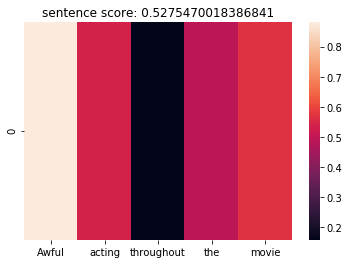

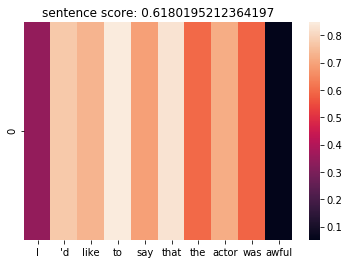

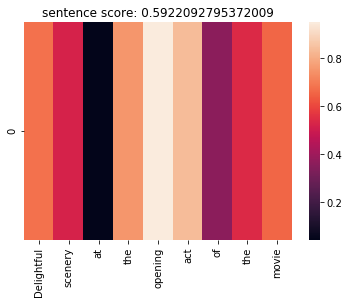

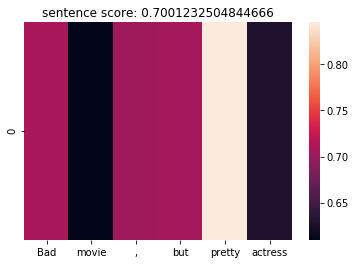

In [0]:
sample_sentences = [
                    "Awful acting throughout the movie",
                    "I'd like to say that the actor was awful",
                    "Delightful scenery at the opening act of the movie",
                    "Bad movie, but pretty actress"
]
for sentence in sample_sentences:
  sentiment_heatmap(sentence)

**Question**
- What would you say about the interpretability of the results ? to what can we blame for this ?
- Do you think averaging the token scores was a good decision ? How could we do better ?